In [1]:
project_dir = '../../'
data_dir = project_dir + 'data/'

import sys
sys.path.append(project_dir + 'NN/')

import numpy as np
import time
import matplotlib.pyplot as plt
from MLP import MLP

In [2]:
data_monk=np.loadtxt("../../data/MONK/monks-1.train",usecols=range(0,7))
labels=np.reshape(data_monk[:,0],(len(data_monk),1))
input_data=data_monk[:,1:]

data_monk_val=np.loadtxt("../../data/MONK/monks-1.test",usecols=range(0,7))
val_labels=np.reshape(data_monk_val[:,0],(len(data_monk_val),1))
val_data=data_monk_val[:,1:]

In [3]:
structure=[20,np.shape(labels)[1]]
act_func=[("sigmoid",1),("sigmoid",1)]
start=[0.05,0.01]

netw = MLP(structure, func=act_func,
           starting_points=start)

In [6]:
learning_rate=1e-2
lamb=1e-4
N_epoch=500
netw.train(input_data, labels, val_data, val_labels,
        epoch = N_epoch,eta = learning_rate, lamb = lamb)

Epoch 1000:  [train MEE = 0.3554]  [val MEE = 0.4019]                              
Elapsed time: 1.4362263679504395 s


In [5]:
train_pred = netw.predict(input_data)
val_pred = netw.predict(val_data)

In [6]:
netw.network[0].input=input_data
netw.feedforward()

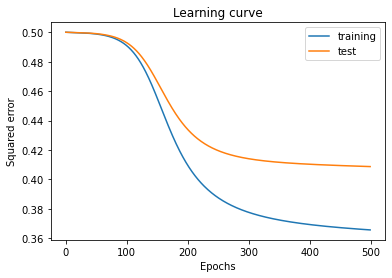

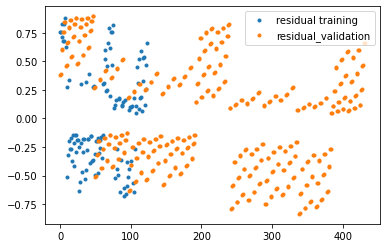

In [7]:
x = np.arange(len(netw.train_MEE))

plt.plot(x,netw.train_MEE,label="training")
plt.plot(x,netw.val_MEE,label="test")
plt.title("Learning curve")
plt.xlabel("Epochs")
plt.ylabel("Squared error")
plt.legend()
plt.show()

plt.plot(np.arange(len(labels)),labels[:,0]-train_pred[:,0],".",label="residual training")
plt.plot(np.arange(len(val_labels)),val_labels[:,0]-val_pred[:,0],".",label="residual_validation")
plt.legend()
netw.network[0].input=input_data
plt.show()
